full
full
internet
internet
academic
academic
prose
prose
dialogue
dialogue
symbolic
symbolic


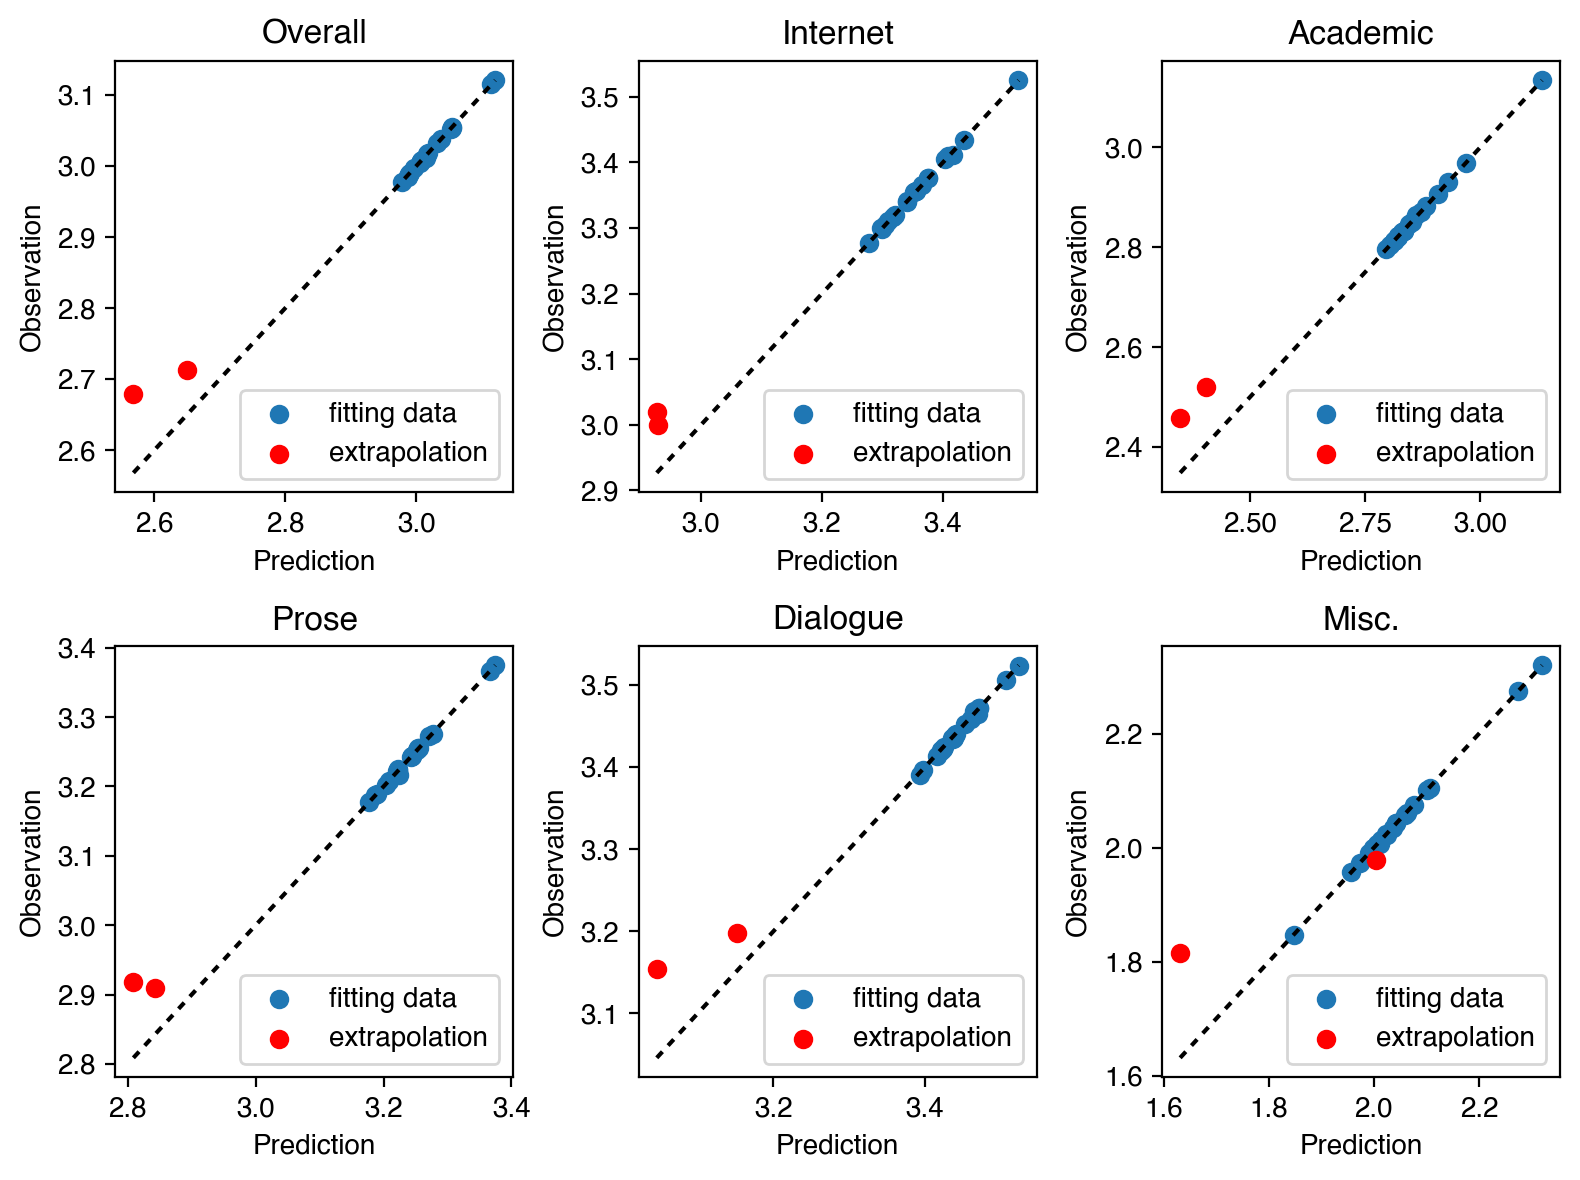

In [65]:
import json
import matplotlib.pyplot as plt

with open("data/RPJ.predictions.json", "r") as f:
    data = json.load(f)


fig, axes = plt.subplots(2, 3, figsize=(8, 6), dpi=200)
axes = [ax for row in axes for ax in row]

domains = ["full", "internet", "academic", "prose", "dialogue", "symbolic"]
domain_names = {"full": "Overall", "internet": "Internet", "academic": "Academic", "prose": "Prose", "dialogue": "Dialogue", "symbolic": "Misc."}
    
for domain, ax in zip(domains, axes):
    tr_predictions, tr_observations = [], []
    eval_predictions, eval_observations = [], []
    for ratio in data[domain]:
        if '100000' in data[domain][ratio]:
            eval_predictions.append(data[domain][ratio]['100000'][0])
            eval_observations.append(data[domain][ratio]['100000'][1])
            print(domain)
        else:
            tr_predictions.append(data[domain][ratio]['30000'][0])
            tr_observations.append(data[domain][ratio]['30000'][1])
    ax.scatter(tr_predictions, tr_observations, label="fitting data")
    ax.scatter(eval_predictions, eval_observations, color="red", label="extrapolation")

    diag = [
        min(tr_predictions+tr_observations+eval_predictions+eval_observations),
        max(tr_predictions+tr_observations+eval_predictions+eval_observations),
    ]
    # ax.set_xscale("log"); ax.set_yscale("log")
    ax.plot(diag, diag, dashes=[2,2], color="black")
    ax.set_title(domain_names[domain], fontsize=12)
    ax.set_xlabel("Prediction", fontsize=10); ax.set_ylabel("Observation", fontsize=10)
    ax.legend(loc='lower right')
plt.subplots_adjust(hspace=0.38, wspace=0.4)
plt.tight_layout()
plt.savefig("savefigs/predictions.png")

In [7]:
data[domain][ratio][30000]

KeyError: 30000